In [1]:
import numpy as np
import matplotlib.pyplot as plt


try:
    import mplhep as hep
    hep.style.use("LHCb2")
except:
    print("mplhep not found. Falling back to default plot style")



In [2]:
solutionsFile = './solution.csv'

In [3]:
data = np.genfromtxt(solutionsFile,delimiter=',',names=True)
print(data.dtype.names)
omh2 = 0.12*data['Yxd'][-1]/(6.8e-13)
print(f'Omega*h^2 = {omh2:1.4g}')

('x', 'Yxd', 'Dxd__xd', 'Cxdxdx_ddx', 'Cxdxdx_uux', 'Cxdxdx_ssx', 'Cxdxdx_ccx', 'Cxdxdx_bbx', 'Cxdxdx_ttx')
Omega*h^2 = 30.24


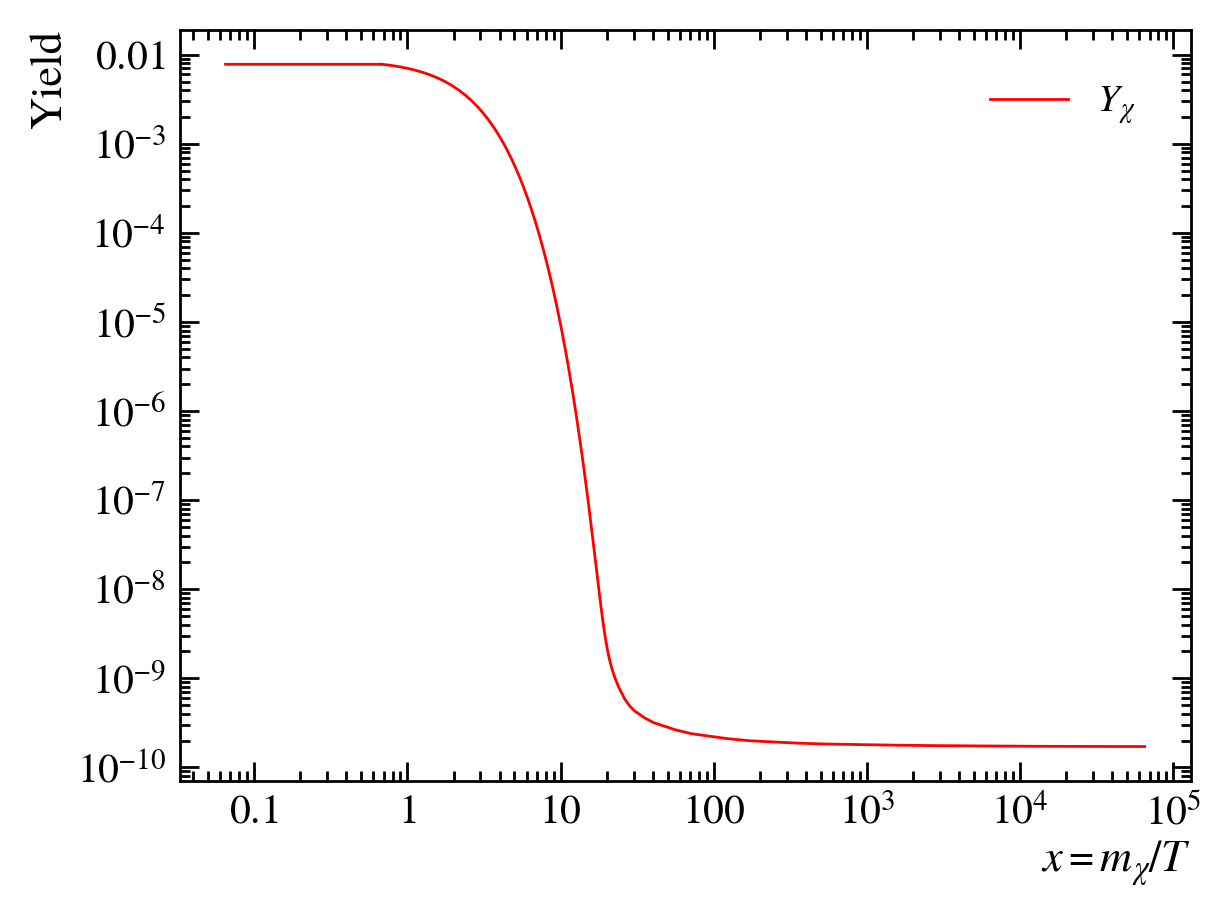

In [4]:
# fig = plt.figure(figsize=(10,8))
plt.plot(data['x'],data['Yxd'], 'r', linewidth=2, label = r'$Y_{\chi}$')
plt.xlabel(r'$x = m_{\chi}/T$')
plt.ylabel('Yield')

plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.show()